
# Notice on final exam

* __Exam format__: open book and take home. 
* __Exam time__: From "9:00 am, Dec. 3, 2020" to "9:00 am, Dec. 4, 2020"
* __Submit exam__: Send the Jupyter notebook file to the instructor (mingming.li@asu.edu)
* __Exam policy__:
    - You can check the lecture notes and search online for solutions. However, you can not discuss it with other students and you can not ask for help from any other people
    - Let the instructor know if any question is unclear by sending emails. The instructor will only clarify the questions, and will not give any answers and hints to you.
    - The instructor will have the zoom meeting open on Dec. 3rd at 9:00 - 10:30 AM, Thursday, and you can ask questions for clarification during this time. If you need more time to finish the exam, you can take the exam home without penalty. However, you must submit your exam no later than 9:00 am, Dec. 4, 2020.
    - Work on easy problems first
    - __Exam submission after 9:00 am, Dec. 4, 2020 will not be considered.__

# scipy

The following materials is modified from scipy tutorial and scipy-lectures.org

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python.

SciPy is organized into subpackages covering different scientific computing domains.

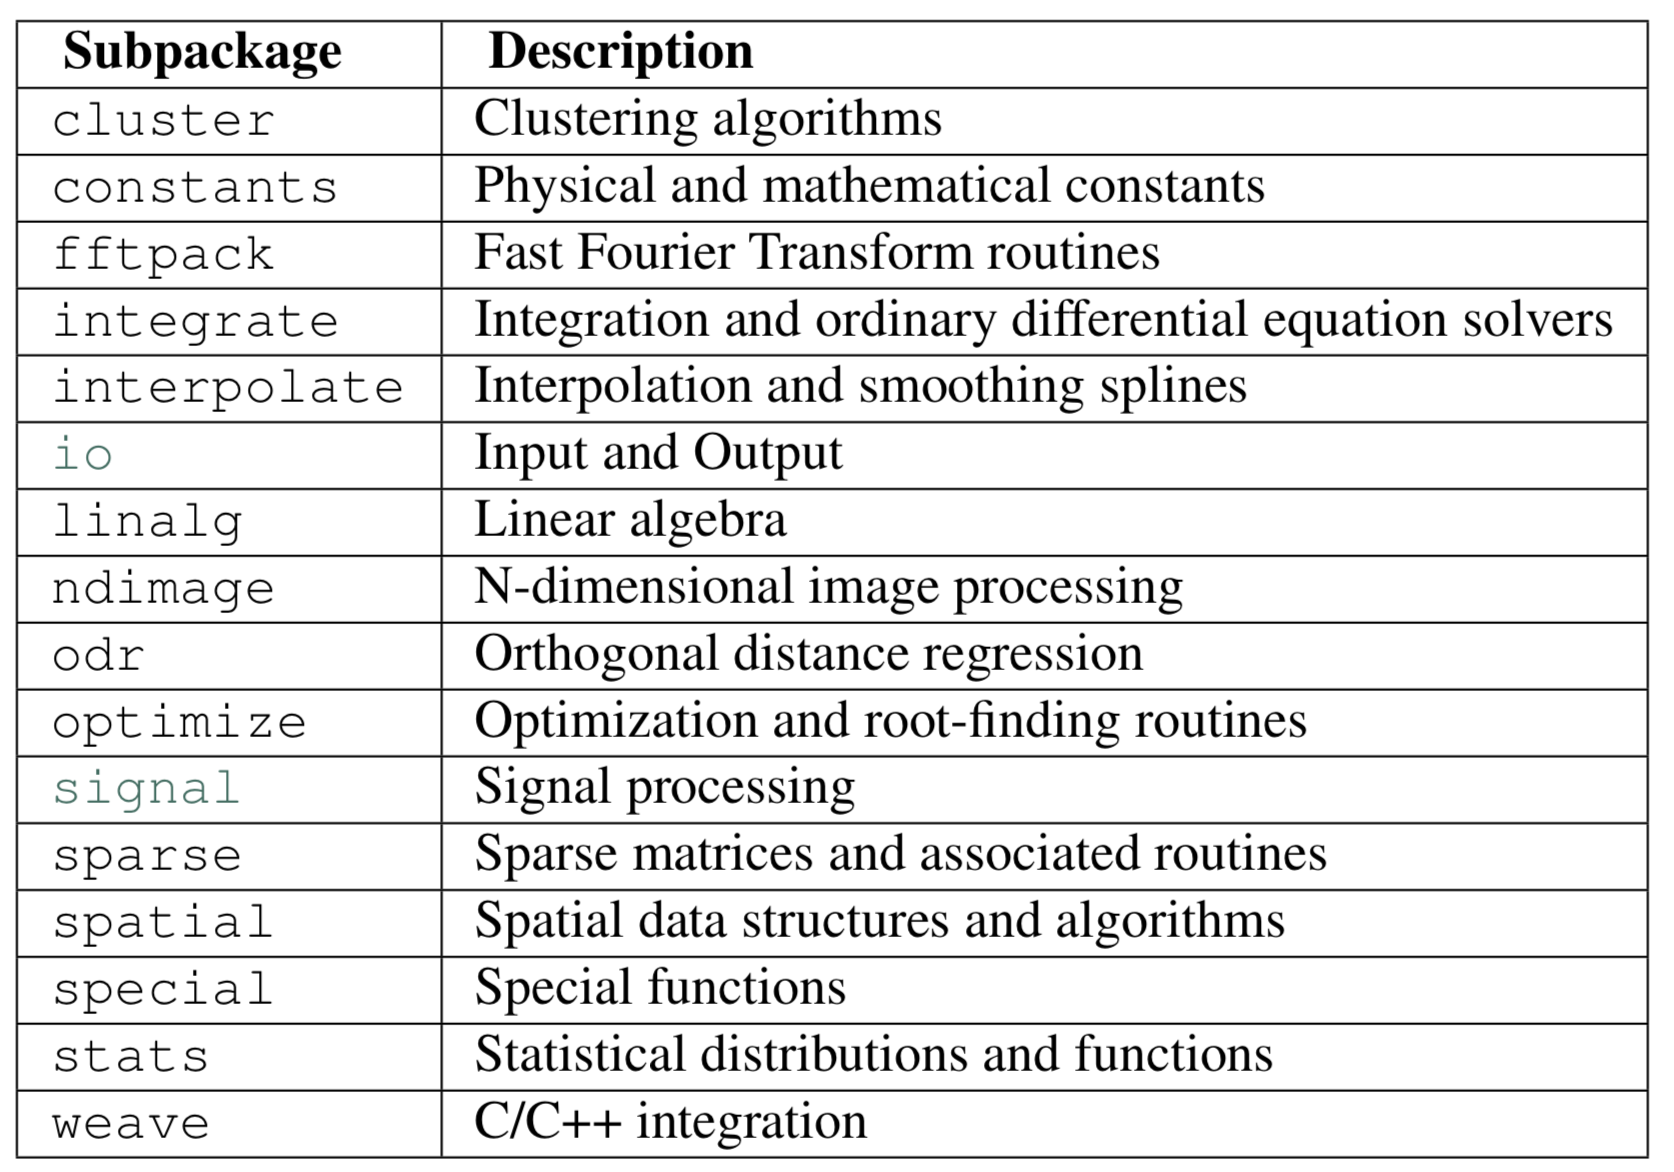

In [72]:
from IPython.display import Image
Image("./images/scipy-package.png",width=400)

## Curve fitting with the 'curve_fit' function

One of the most important tasks in any experimental science is modeling data and determining how well some theoretical function describes experimental data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Example 1

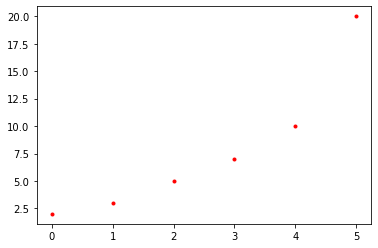

In [20]:
xdata=np.array([0,1,2,3,4,5])
ydata=np.array([2,3,5,7,10,20])
plt.plot(xdata,ydata,'r.')

[ 0.875      -1.14642857  2.67857143]


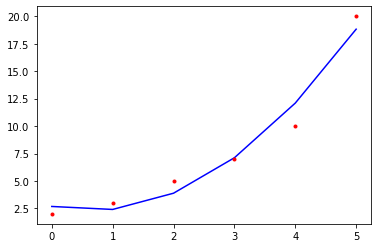

In [24]:
def lines(x,a,b,c):
    return a*x*x+b*x+c

popt,pcov= curve_fit(lines, xdata, ydata)
ydata_fit=lines(xdata,popt[0],popt[1],popt[2])
plt.plot(xdata,ydata_fit,'b')
plt.plot(xdata,ydata,'r.')
print(popt)

The fitting residual can be calculated by:
\begin{align}
residual=\sqrt{[\sum_{i=1}^n(y^i-y_{fit}^i)^2]/n}
\end{align}
where $y^i$ is the observed y-data, and $y_{fit}^i$ is the modeled y-data computed from the fitting function, $n$ is the number of data points

In [25]:
residual=np.sqrt(((ydata-ydata_fit)**2).sum()/ydata.size)
print(residual)

1.1427827356730502


## Example 2

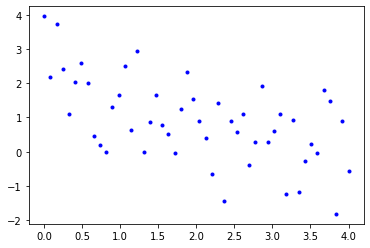

In [31]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 1.0 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b.', label='data')

[2.86386392 1.03208885 0.21798382]
residual=0.934795


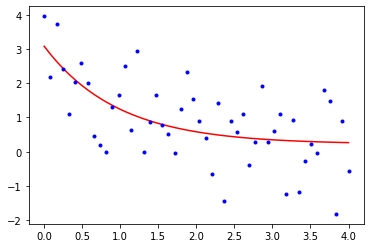

In [33]:

popt, pcov = curve_fit(func, xdata, ydata)
ydata_fit=func(xdata, *popt);
plt.plot(xdata,ydata_fit,'r-')
plt.plot(xdata, ydata, 'b.', label='data')
print(popt)
residual=((ydata-ydata_fit)**2).sum()/ydata.size
print('residual=%f' % residual)

## Example 3

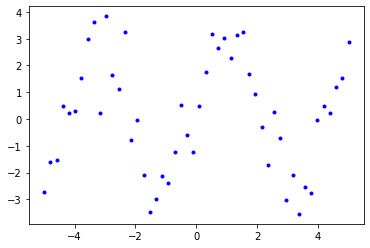

In [34]:
xdata = np.linspace(-5, 5, num=50)
ydata = 2.9 * np.sin(1.5 * xdata) + np.random.normal(size=50)
plt.plot(xdata, ydata, 'b.', label='data')

[ 2.72431719  1.46732568 -1.54576179]
residual=0.889251


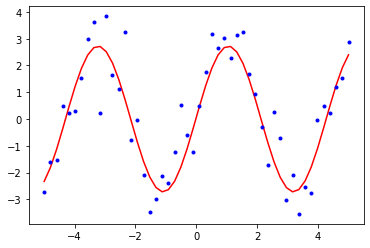

In [39]:
def test_func(x, a, b,c):
    return a * np.cos(b * x+c)
popt, pcov = curve_fit(test_func, xdata, ydata, p0=[2, 2,1])#p0 is the initial guess of the parameters
ydata_fit=test_func(xdata, *popt)
plt.plot(xdata, ydata_fit, 'r-')
plt.plot(xdata, ydata, 'b.', label='data')
print(popt)
residual=((ydata-ydata_fit)**2).sum()/ydata.size
print('residual=%f' % residual)

### Explore different functions to fit the above data

# [Exercise 16](EX16-curve-fitting.ipynb)

## Interpolation: scipy.interpolate


scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists.

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


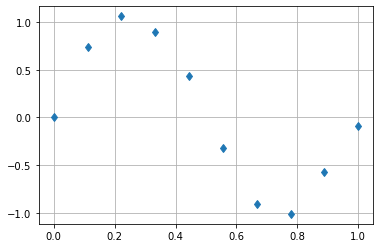

In [29]:
# Generate data
import numpy as np
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

plt.plot(measured_time, measures, 'd', ms=6, label='measures')
plt.grid()
print(measured_time)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


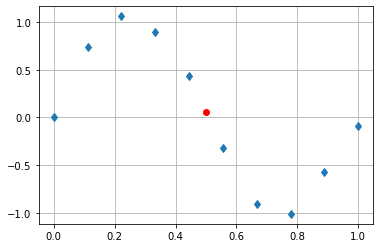

In [30]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
linear_interp(0.5)
plt.plot(measured_time, measures, 'd', ms=6, label='measures')
plt.plot(0.5,linear_interp(0.5),'ro')
plt.grid()
print(measured_time)

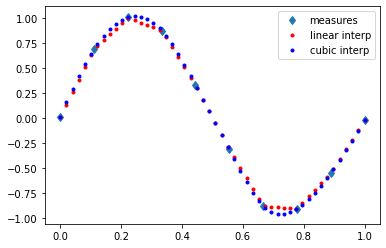

In [31]:
# Generate data
import numpy as np
np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise

# Interpolate it to new time points
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'd', ms=6, label='measures')
plt.plot(interpolation_time, linear_results,'r.', label='linear interp')
plt.plot(interpolation_time, cubic_results,'b.', label='cubic interp')
plt.legend()
plt.show()

In [32]:
linear_interp(0.5)

array(0.00695489)

## Discrete (fast) Fourier transforms

In general, a function can be fully represented by a linear summmation of sin and cos functions.

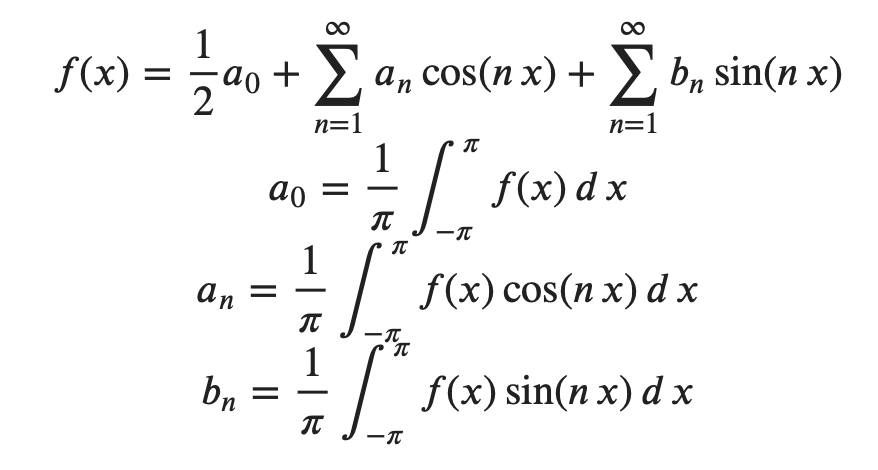

In [36]:
Image("./images/equation.png",width=400)

Here, `n` is related to the frequency of the signal and the $\sqrt{a_n^2+b_n^2}$ is the corresponding amplitude. The goal of Fourier transformation is to find the amplitude at each frequency. After that, we can work on the frequency domain, e.g., filtering data.

The SciPy library has a number of routines for performing discrete Fourier transforms. Before delving into them, we provide a brief review of Fourier transforms and discrete Fourier transforms.

### Continuous and discrete Fourier transforms

The Fourier transform of a function g(t) is given by
\begin{align}
G(f) = \int_{-\infty}^\infty g(t)\, e^{-i\, 2\pi f t}\, dt
\end{align}
where f is the Fourier transform variable; if t is time, then f is frequency. The inverse transform is given by


\begin{align}
g(t) = \int_{-\infty}^\infty G(f)\, e^{i\, 2\pi ft}\, df
\end{align}
Here we define the Fourier transform in terms of the frequency f rather than the angular frequency $\omega = 2\pi f$

- The conventional Fourier transform is defined for continuous functions. When doing numerical analysis, however, you work with discrete data sets, that is, data sets defined for a finite number of points.
- The discrete Fourier transform (DFT) is defined for a function $g_n$ consisting of a set of N discrete data points. Those N data points must be defined at equally-spaced times $t_n=n\Delta t$ where $\Delta t$ is the time between successive data points and n runs from 0 to N-1.
- The discrete Fourier transform (DFT) of $g_n$ is defined as
\begin{align}
G_l = \sum_{n=0}^{N-1} g_n\, e^{-i\,(2\pi/N)\,ln}
\end{align}
where l runs from 0 to N-1. The inverse discrete Fourier transform (iDFT) is defined as
\begin{align}
g_n = \frac{1}{N} \sum_{l=0}^{N-1} G_l\, e^{i\,(2\pi/N)\,ln}
\end{align}
- The DFT is usually implemented on computers using the well-known Fast Fourier Transform (FFT) algorithm

### The SciPy FFT library

The SciPy library scipy.fftpack has many routines that support working with DFTs. The basic FFT routine in scipy.fftpack is appropriately named fft.

### An example

Generate signal

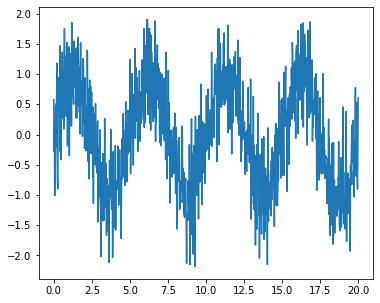

In [42]:
# Seed the random number generator
time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

Compute and plot the power

Text(0, 0.5, 'plower')

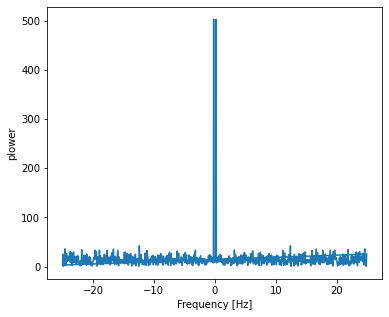

In [43]:
from scipy import fftpack
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

Remove all the high frequencies (>1 Hz in this example)
- We now remove all the high frequencies and transform back from frequencies to signal.

C:\Users\limm0\Miniconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


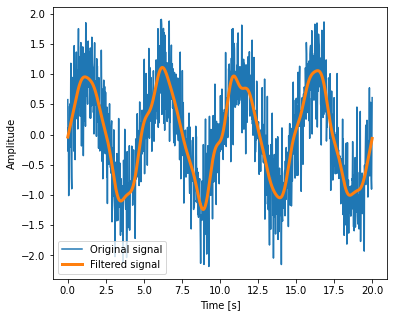

In [44]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > 1.0] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

# [Exercise 17](EX17-fft.ipynb)

## Solving non-linear equations

__Single equations of a single variable__

We begin with a concrete example. Suppose we want to find the solutions to the equation
\begin{align}
\tan x=\sqrt{(8/x)^2-1}
\end{align}

A word of caution: solving non-linear equations can be a tricky business so it is important that you have a good sense of the behavior of the function you are trying to solve. The best way to do this is to plot the function over the domain of interest before trying to find the solutions. This will greatly assist you in finding the solutions you seek and avoiding spurious solutions.

Text(0, 0.5, 'tan(x)')

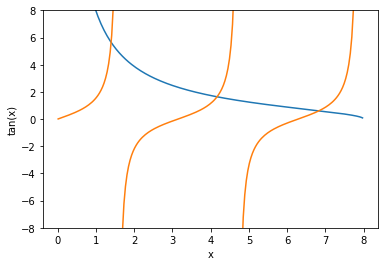

In [47]:
x = np.arange(0.01, 8., 0.04)
y = np.sqrt((8./x)**2-1.)
ytan = np.tan(x)
ytan = np.ma.masked_where(np.abs(ytan)>20., ytan)

plt.figure(1)

plt.subplot(1, 1, 1)
plt.plot(x, y)
plt.plot(x, ytan)
plt.ylim(-8, 8)
plt.xlabel("x")
plt.ylabel("tan(x)")

Can we solve the equation using sympy's solve function?

The first step towards obtaining a numerical solution is to rewrite the equation to be solved in the form f(x)=0. Doing so, the above equation becomes
\begin{align}
\tan x - \sqrt{(8/x)^2-1} = 0
\end{align}

One of the workhorses for finding solutions to a single variable nonlinear equation is the method of Brent, discussed in many texts on numerical methods. SciPy’s implementation of the Brent algorithm is the function scipy.optimize.brentq(f, a, b), which has three required arguments. The first f is the name of the user-defined function to be solved. The next two, a and b are the x values that bracket the solution you are looking for. You should choose a and b so that there is only one solutions in the interval between a and b. Brent’s method also requires that f(a) and f(b) have opposite signs; an error message is returned if they do not. Thus to find the three solutions to $\tan (x) - \sqrt{(8/x)^2-1} = 0$, we need to run scipy.optimize.brentq(f, a, b) three times using three different values of a and b that bracket each of the three solutions.


True roots:
f(1.39547) = -6.39e-14
f(4.16483) = -7.95e-14
f(6.83067) = -1.22e-15


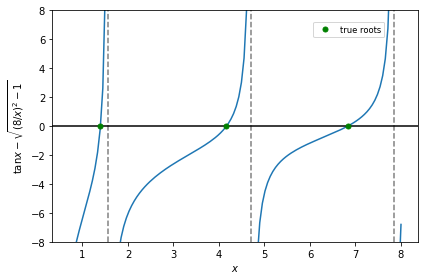

In [48]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

def tdl(x):
    y = 8./x
    return np.tan(x) - np.sqrt(y*y-1.0)

# Find true roots

rx1 = scipy.optimize.brentq(tdl, 0.5, 0.49*np.pi)
rx2 = scipy.optimize.brentq(tdl, 0.51*np.pi, 1.49*np.pi)
rx3 = scipy.optimize.brentq(tdl, 1.51*np.pi, 2.49*np.pi)
rx = np.array([rx1, rx2, rx3])
ry = np.zeros(3)
# print using a list comprehension
print('\nTrue roots:')
print('\n'.join('f({0:0.5f}) = {1:0.2e}'.format(x, tdl(x)) for x in rx))

# Plot function and various roots

x = np.linspace(0.7, 8, 128)
y = tdl(x)
# Create masked array for plotting
ymask = np.ma.masked_where(np.abs(y)>20., y)

plt.figure(figsize=(6, 4))
plt.plot(x, ymask)
plt.axhline(color='black')
plt.axvline(x=np.pi/2., color="gray", linestyle='--', zorder=-1)
plt.axvline(x=3.*np.pi/2., color="gray", linestyle='--', zorder=-1)
plt.axvline(x=5.*np.pi/2., color="gray", linestyle='--', zorder=-1)
plt.xlabel(r'$x$')
plt.ylabel(r'$\tan x - \sqrt{(8/x)^2-1}$')
plt.ylim(-8, 8)

plt.plot(rx, ry, 'og', ms=5, label='true roots')

plt.legend(numpoints=1, fontsize='small', loc = 'upper right',
           bbox_to_anchor = (0.92, 0.97))
plt.tight_layout()

SciPy provides a number of other methods for solving nonlinear equations of a single variable. It has an implementation of the Newton-Raphson method called scipy.optimize.newton. It’s the racecar of such methods; its super fast but less stable that the Brent method. To fully realize its speed, you need to specify not only the function to be solved, but also its first derivative, which is often more trouble than its worth. You can also specify its second derivative, which may further speed up finding the solution. If you do not specify the first or second derivatives, the method uses the secant method, which is usually slower than the Brent method.

Other methods, including the Ridder (scipy.optimize.ridder) and bisection (scipy.optimize.bisect), are also available, although the Brent method is generally superior. SciPy let’s you use your favorite.

## Linear algebra

The SciPy package for linear algebra is called scipy.linalg.

__Basic computations in linear algebra__

In [49]:
import scipy.linalg
a = np.array([[-2, 3], [4, 5]])
a

array([[-2,  3],
       [ 4,  5]])

In [50]:
scipy.linalg.det(a)

-22.0

The inverse of a matrix is computed using the scipy.linalg.inv function, while the product of two matrices is calculated using the NumPy dot function:

In [51]:
b = scipy.linalg.inv(a)
b

array([[-0.22727273,  0.13636364],
       [ 0.18181818,  0.09090909]])

In [52]:
np.dot(a,b)

array([[1., 0.],
       [0., 1.]])

__Solving systems of linear equations__

Solving systems of equations is nearly as simple as constructing a coefficient matrix and a column vector. Suppose you have the following system of linear equations to solve:
\begin{align}
2x_1 + 4x_2 + 6x_3 &= 4\\
 x_1 - 3x_2 - 9x_3 &= -11\\
8x_1 + 5x_2 - 7x_3 &= 1\\
\end{align}
The first task is to recast this set of equations as a matrix equation of the form $\mathsf{A}\, \mathbf{x} = \mathbf{b}$. In this case, we have:
\begin{align}
\mathsf{A} = \left(\begin{array}{ccc}2 &  4 &  6 \\
                                     1 & -3 & -9 \\
                                     8 &  5 & -7 \end{array}\right)
                                     \;,\quad
\mathbf{x} = \left(\begin{array}{c}x_1 \\x_2 \\x_3\end{array}\right)
                                     \;,\quad
\mathbf{b} = \left(\begin{array}{c}4 \\-11 \\1\end{array}\right) \
\end{align}

In [53]:
A = np.array([[2, 4, 6], [1, -3, -9], [8, 5, -7]])
b = np.array([4, -11, 2])
scipy.linalg.solve(A,b)

array([-8.91304348, 10.2173913 , -3.17391304])

__Eigenvalue problems__

One of the most common problems in science and engineering is the eigenvalue problem, which in matrix form is written as
\begin{align}
\mathsf{A}\mathbf{x} = \lambda \mathbf{x}
\end{align}
where $\mathsf{A}$ is a square matrix, $\mathbf{x}$ is a column vector, and $\lambda$ is a scalar (number). Given the matrix $\mathsf{A}$, the problem is to find the set of eigenvectors $\mathbf{x}$ and their corresponding eigenvalues $\lambda$ that solve this equation.

We can solve eigenvalue equations like this using scipy.linalg.eig. the outputs of this function is an array whose entries are the eigenvalues and a matrix whose rows are the eigenvectors. Let’s return to the matrix we were using previously and find its eigenvalues and eigenvectors.

In [54]:
A = np.array([[2, 4, 6],[1, -3, -9],[8, 5, -7]])
A

array([[ 2,  4,  6],
       [ 1, -3, -9],
       [ 8,  5, -7]])

In [55]:
lam, evec = scipy.linalg.eig(A)

In [56]:
lam

array([ 2.40995356+0.j, -8.03416016+0.j, -2.3757934 +0.j])

In [57]:
evec

array([[-0.77167559, -0.52633654,  0.57513303],
       [ 0.50360249,  0.76565448, -0.80920669],
       [-0.38846018,  0.36978786,  0.12002724]])

## Finding the minimum of a scalar function

\begin{align}
    x^2 + 10\sin(x)
\end{align}
for x in [-10,10]

In [58]:
from scipy import optimize

In [59]:
def f(x):
    return x**2 + 10*np.sin(x)

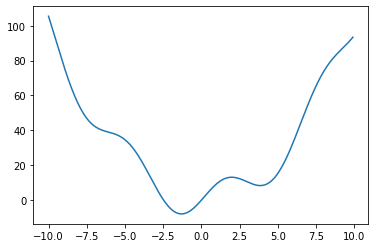

In [60]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [61]:
result = optimize.minimize(f,x0=0)#x0 is the starting point to search minimum values
result.x

array([-1.30644012])

A possible issue with this approach is that, if the function has local minima, the algorithm may find these local minima instead of the global minimum depending on the initial point x0

In [62]:
result = optimize.minimize(f,x0=5)#x0 is the starting point to search minimum values
result.x

array([3.83746712])

More information about minimize can be found at:
    http://scipy-lectures.org/advanced/mathematical_optimization/index.html#mathematical-optimization

## Numerical intergration

### Single integrals

The most generic integration routine is scipy.integrate.quad()

1 Compute: 
\begin{align}
\int_0^{\pi/2}\sin(t)dt
\end{align}

In [63]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
res,err# res is the result and err is the error

(0.9999999999999999, 1.1102230246251564e-14)

2 Compute:
\begin{align}
    \int_0^1 e^{-x^2} dx
\end{align}

In [64]:
f = lambda x : np.exp(-x**2)*np.sin(x)
quad(f, 0, 1)

(0.2946981822491217, 3.271807072481555e-15)

The function call scipy.integrate.quad(f, 0, 1) returns two numbers. The first is 0.7468..., which is the value of the integral, and the second is 8.29...e-15, which is an estimate of the absolute error in the value of the integral, which we see is quite small compared to 0.7468.

A simpler way:

In [65]:
quad(lambda x : np.exp(-x**2), 0, 1)

(0.7468241328124271, 8.291413475940725e-15)

In [66]:
quad(lambda x : np.exp(-x**2), 0, np.inf)

(0.8862269254527579, 7.101318390915439e-09)

In [67]:
quad(lambda x : np.exp(-x**2), -np.inf, 1)

(1.6330510582651852, 3.6696187632280345e-11)

In [68]:
quad(np.exp, 0, 1)

(1.7182818284590453, 1.9076760487502457e-14)

In [69]:
quad(np.sin, -0.5, 0.5)

(0.0, 2.707864644566304e-15)

In [70]:
quad(np.cos, -0.5, 0.5)

(0.9588510772084061, 1.0645385431034061e-14)

### Double integrals

The scipy.integrate function dblquad can be used to numerically evaluate double integrals of the form
\begin{align}
\int_{y=a}^{y=b} dy \int_{x=g(y)}^{x=h(y)} dx\,f(x,y)
\end{align}
The general form of dblquad is

scipy.integrate.dblquad(func, a, b, gfun, hfun)
where func if the name of the function to be integrated, a and b are the lower and upper limits of the x variable, respectively, and gfun and hfun are the names of the functions that define the lower and upper limits of the y variable.

As an example, let’s perform the double integral
\begin{align}
\int_0^{1/2} dy \int_0^{\sqrt{1-4y^2}} 16xy\, dx
\end{align}
We define the functions f, g, and h, using lambda expressions. Note that even if g, and h are constants, as they may be in many cases, they must be defined as functions, as we have done here for the lower limit.

In [71]:
from scipy.integrate import dblquad
f = lambda x, y : 16*x*y
g = lambda y : 0
h = lambda y : np.sqrt(1-4*y**2)
dblquad(f, 0, 0.5, g, h)

(0.5, 1.7092350012594845e-14)

Of course, the lower limit can also be a function of y, as we demonstrate here by performing the integral
\begin{align}
\int_0^{1/2} dy \int_{1-2y}^{\sqrt{1-4y^2}} 16xy\, dx
\end{align}
The code for this is given by

In [ ]:
g = lambda y : 1-2*y
dblquad(f, 0, 0.5, g, h)